# Computational Drug Discovery

## Download Bioactivity Data

**By Thais ARNS.**

Inspired by Chanin Nantasenamat, aka 'Data Professor' on YouTube.

In this Jupyter notebook, I will build a machine learning model using the ChEMBL bioactivity data for **Dengue fever** targets (especifically DENV-2).

# Part 1

## Data Collection and Pre-Processing from the ChEMBL Database


# ChEMBL Database

ChEMBL (https://www.ebi.ac.uk/chembl/) is a manually curated database of bioactive molecules with drug-like properties. It brings together chemical, bioactivity and genomic data to aid the translation of genomic information into effective new drugs.

As of July 2022:

- 14,855 targets
- 2,157,379 distinct compounds
- 19,286,751 activities
- 84,092 publications
- 194 deposited datasets

Current Release: ChEMBL 30.

# Installing libraries

### Install the ChEMBL web service package so that we can retrieve bioactivity data from the ChEMBL Database.

In [ ]:
#! pip install chembl_webresource_client

## Importing libraries

In [1]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

## Search for Target protein

In [2]:
target = new_client.target
target_query = target.search('dengue')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Dengue virus,Dengue virus,15.0,False,CHEMBL613757,[],ORGANISM,12637
1,[],Dengue virus 1,Dengue virus 1,13.0,False,CHEMBL613360,[],ORGANISM,11053
2,[],Dengue virus 2,Dengue virus 2,13.0,False,CHEMBL613966,[],ORGANISM,11060
3,[],Dengue virus 3,Dengue virus 3,13.0,False,CHEMBL612717,[],ORGANISM,11069
4,[],Dengue virus 4,Dengue virus type 4,11.0,False,CHEMBL613728,[],ORGANISM,11070
5,"[{'xref_id': 'P29990', 'xref_name': None, 'xre...",Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,9.0,False,CHEMBL5980,"[{'accession': 'P29990', 'component_descriptio...",SINGLE PROTEIN,31634


## Select and retrieve bioactivity data for Dengue virus type 2 NS3 protein (5th entry).

We will assign the fifth entry (which corresponds to the target protein, Dengue virus type 2 NS3 protein) to the **selected_target** variable.

In [3]:
#And we will obtain the UNIQUE target ID for the target
selected_target = targets.target_chembl_id[5]
selected_target

'CHEMBL5980'

#### We retrieve only bioactivity data for Influenza A virus Hemagglutinin (CHEMBL5980) that are reported as IC 50values in nM (nanomolar) unit.

In [4]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [5]:
df = pd.DataFrame.from_dict(res)

In [6]:
df.head(5)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,active,7018430,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
1,active,7018431,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,12.31
2,active,7018432,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
3,active,7018433,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,50.97
4,active,7018434,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0


Finally we will save the resulting bioactivity data to a CSV file **bioactivity_data.csv**.

In [7]:
df.to_csv('dengue_01_bioactivity_data_raw.csv', index=False)

**Handling missing data**

If any compounds has missing value for the standard_value column, drop it.

In [8]:
df2 = df[df.standard_value.notna()]
df2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,active,7018430,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
1,active,7018431,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,12.31
2,active,7018432,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
3,active,7018433,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,50.97
4,active,7018434,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,None,20674640,[],CHEMBL4621577,Inhibition of Dengue virus serotype 2 NS2B-NS3...,B,None,None,BAO_0000190,BAO_0000219,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,1.3
1137,None,20674641,[],CHEMBL4621577,Inhibition of Dengue virus serotype 2 NS2B-NS3...,B,None,None,BAO_0000190,BAO_0000219,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,3.1
1138,None,20674642,[],CHEMBL4621577,Inhibition of Dengue virus serotype 2 NS2B-NS3...,B,None,None,BAO_0000190,BAO_0000219,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,2.5
1139,None,20674643,[],CHEMBL4621577,Inhibition of Dengue virus serotype 2 NS2B-NS3...,B,None,None,BAO_0000190,BAO_0000219,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,0.54


In [9]:
len(df2.canonical_smiles.unique())

1086

In [10]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,active,7018430,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
1,active,7018431,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,12.31
2,active,7018432,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
3,active,7018433,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,50.97
4,active,7018434,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,BAO_0000019,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,None,20674640,[],CHEMBL4621577,Inhibition of Dengue virus serotype 2 NS2B-NS3...,B,None,None,BAO_0000190,BAO_0000219,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,1.3
1137,None,20674641,[],CHEMBL4621577,Inhibition of Dengue virus serotype 2 NS2B-NS3...,B,None,None,BAO_0000190,BAO_0000219,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,3.1
1138,None,20674642,[],CHEMBL4621577,Inhibition of Dengue virus serotype 2 NS2B-NS3...,B,None,None,BAO_0000190,BAO_0000219,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,2.5
1139,None,20674643,[],CHEMBL4621577,Inhibition of Dengue virus serotype 2 NS2B-NS3...,B,None,None,BAO_0000190,BAO_0000219,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,0.54


## Data pre-processing of the bioactivity data

### Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame

In [11]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,100000.0
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,12310.0
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,100000.0
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,50970.0
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,100000.0
...,...,...,...
1136,CHEMBL4640021,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,1300.0
1137,CHEMBL4642885,CCCCCC(=O)N[C@@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OC...,3100.0
1138,CHEMBL4636584,N=C(N)NCc1ccc(CNC(=O)[C@H](NC(=O)c2ccc(Oc3cccc...,2500.0
1139,CHEMBL4633312,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,540.0


Saves dataframe to CSV file

In [12]:
df3.to_csv('dengue_02_bioactivity_data_preprocessed.csv', index=False)

## Labeling compounds as either being active, inactive or intermediate

The bioactivity data is in the IC50 unit. 
Compounds having values of less than 1000 nM will be considered to be active while those greater than 10,000 nM will be considered to be inactive. 
As for those values in between 1,000 and 10,000 nM will be referred to as intermediate.

In [13]:
df4 = pd.read_csv('dengue_02_bioactivity_data_preprocessed.csv')

In [14]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [15]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,100000.0,inactive
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,12310.0,inactive
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,100000.0,inactive
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,50970.0,inactive
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,100000.0,inactive
...,...,...,...,...
1098,CHEMBL4640021,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,1300.0,intermediate
1099,CHEMBL4642885,CCCCCC(=O)N[C@@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OC...,3100.0,intermediate
1100,CHEMBL4636584,N=C(N)NCc1ccc(CNC(=O)[C@H](NC(=O)c2ccc(Oc3cccc...,2500.0,intermediate
1101,CHEMBL4633312,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,540.0,active


Saves dataframe to CSV file

In [16]:
df5.to_csv('dengue_03_bioactivity_data_curated.csv', index=False)

# Part 2
# Descriptor Calculation and Exploratory Data Analysis

## Install conda and rdkit

In [17]:
#! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
#! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
#! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
#! conda install -c rdkit rdkit -y
#import sys
#sys.path.append('/usr/local/lib/python3.7/site-packages/')

## Load bioactivity data

In [18]:
import pandas as pd

In [19]:
df = pd.read_csv('dengue_03_bioactivity_data_curated.csv')

In [20]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [21]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [22]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL1401841,100000.0,inactive,COc1ccc2nc3cccc(OC)c3nc2c1
1,CHEMBL1608853,12310.0,inactive,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O
2,CHEMBL1429799,100000.0,inactive,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...
3,CHEMBL246446,50970.0,inactive,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1
4,CHEMBL1383455,100000.0,inactive,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...
...,...,...,...,...
1098,CHEMBL4640021,1300.0,intermediate,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...
1099,CHEMBL4642885,3100.0,intermediate,CCCCCC(=O)N[C@@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OC...
1100,CHEMBL4636584,2500.0,intermediate,N=C(N)NCc1ccc(CNC(=O)[C@H](NC(=O)c2ccc(Oc3cccc...
1101,CHEMBL4633312,540.0,active,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...


## Calculate Lipinski descriptors


Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. 

Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. 

Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

**The Lipinski's Rule stated the following:**
- Molecular weight < 500 Dalton
- Octanol-water partition coefficient (LogP) < 5
- Hydrogen bond donors < 5
- Hydrogen bond acceptors < 10

In [23]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

## Calculate descriptors

In [24]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [25]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,240.262,2.80020,0.0,4.0
1,268.224,2.44040,1.0,4.0
2,407.426,1.38560,1.0,5.0
3,306.277,3.84800,1.0,5.0
4,372.772,2.36698,0.0,8.0
...,...,...,...,...
1098,597.719,5.95437,5.0,4.0
1099,542.507,6.08510,3.0,4.0
1100,682.608,7.13527,5.0,5.0
1101,666.609,7.26117,5.0,4.0


## Combine DataFrames
Let's take a look at the 2 DataFrames that will be combined.

In [26]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,240.262,2.80020,0.0,4.0
1,268.224,2.44040,1.0,4.0
2,407.426,1.38560,1.0,5.0
3,306.277,3.84800,1.0,5.0
4,372.772,2.36698,0.0,8.0
...,...,...,...,...
1098,597.719,5.95437,5.0,4.0
1099,542.507,6.08510,3.0,4.0
1100,682.608,7.13527,5.0,5.0
1101,666.609,7.26117,5.0,4.0


In [27]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,100000.0,inactive
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,12310.0,inactive
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,100000.0,inactive
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,50970.0,inactive
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,100000.0,inactive
...,...,...,...,...
1098,CHEMBL4640021,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,1300.0,intermediate
1099,CHEMBL4642885,CCCCCC(=O)N[C@@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OC...,3100.0,intermediate
1100,CHEMBL4636584,N=C(N)NCc1ccc(CNC(=O)[C@H](NC(=O)c2ccc(Oc3cccc...,2500.0,intermediate
1101,CHEMBL4633312,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,540.0,active


Now, let's combine the 2 DataFrame

In [28]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [29]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,100000.0,inactive,240.262,2.80020,0.0,4.0
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,12310.0,inactive,268.224,2.44040,1.0,4.0
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,100000.0,inactive,407.426,1.38560,1.0,5.0
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,50970.0,inactive,306.277,3.84800,1.0,5.0
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,100000.0,inactive,372.772,2.36698,0.0,8.0
...,...,...,...,...,...,...,...,...
1098,CHEMBL4640021,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,1300.0,intermediate,597.719,5.95437,5.0,4.0
1099,CHEMBL4642885,CCCCCC(=O)N[C@@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OC...,3100.0,intermediate,542.507,6.08510,3.0,4.0
1100,CHEMBL4636584,N=C(N)NCc1ccc(CNC(=O)[C@H](NC(=O)c2ccc(Oc3cccc...,2500.0,intermediate,682.608,7.13527,5.0,5.0
1101,CHEMBL4633312,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,540.0,active,666.609,7.26117,5.0,4.0


## Convert IC50 to pIC50

To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10 −9

 
Take the molar value and apply -log10

Delete the standard_value column and create a new pIC50 column

In [30]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

**Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.**

In [31]:
df_combined.standard_value.describe()

count      1103.000000
mean      49620.018132
std       31212.456021
min         400.000000
25%       25090.000000
50%       43050.000000
75%       74375.000000
max      121900.000000
Name: standard_value, dtype: float64

In [32]:
-np.log10( (10**-9)* 100000000 )

1.0

In [33]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [34]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [35]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,240.262,2.80020,0.0,4.0,100000.0
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,268.224,2.44040,1.0,4.0,12310.0
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,407.426,1.38560,1.0,5.0,100000.0
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,306.277,3.84800,1.0,5.0,50970.0
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,372.772,2.36698,0.0,8.0,100000.0
...,...,...,...,...,...,...,...,...
1098,CHEMBL4640021,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,intermediate,597.719,5.95437,5.0,4.0,1300.0
1099,CHEMBL4642885,CCCCCC(=O)N[C@@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OC...,intermediate,542.507,6.08510,3.0,4.0,3100.0
1100,CHEMBL4636584,N=C(N)NCc1ccc(CNC(=O)[C@H](NC(=O)c2ccc(Oc3cccc...,intermediate,682.608,7.13527,5.0,5.0,2500.0
1101,CHEMBL4633312,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,active,666.609,7.26117,5.0,4.0,540.0


In [36]:
df_norm.standard_value_norm.describe()

count      1103.000000
mean      49620.018132
std       31212.456021
min         400.000000
25%       25090.000000
50%       43050.000000
75%       74375.000000
max      121900.000000
Name: standard_value_norm, dtype: float64

In [37]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,240.262,2.80020,0.0,4.0,4.000000
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,268.224,2.44040,1.0,4.0,4.909742
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,407.426,1.38560,1.0,5.0,4.000000
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,306.277,3.84800,1.0,5.0,4.292685
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,372.772,2.36698,0.0,8.0,4.000000
...,...,...,...,...,...,...,...,...
1098,CHEMBL4640021,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,intermediate,597.719,5.95437,5.0,4.0,5.886057
1099,CHEMBL4642885,CCCCCC(=O)N[C@@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OC...,intermediate,542.507,6.08510,3.0,4.0,5.508638
1100,CHEMBL4636584,N=C(N)NCc1ccc(CNC(=O)[C@H](NC(=O)c2ccc(Oc3cccc...,intermediate,682.608,7.13527,5.0,5.0,5.602060
1101,CHEMBL4633312,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,active,666.609,7.26117,5.0,4.0,6.267606


In [38]:
df_final.pIC50.describe()

count    1103.000000
mean        4.438556
std         0.412223
min         3.913996
25%         4.128573
50%         4.366027
75%         4.600502
max         6.397940
Name: pIC50, dtype: float64

In [39]:
df_final.to_csv('dengue_04_bioactivity_data_3class_pIC50.csv')

## Removing the 'intermediate' bioactivity class

Here, we will be removing the intermediate class from our data set.

In [40]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,240.262,2.80020,0.0,4.0,4.000000
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,268.224,2.44040,1.0,4.0,4.909742
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,407.426,1.38560,1.0,5.0,4.000000
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,306.277,3.84800,1.0,5.0,4.292685
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,372.772,2.36698,0.0,8.0,4.000000
...,...,...,...,...,...,...,...,...
1078,CHEMBL3335490,N=C(N)NCCC[C@H](NC(=O)c1ccccc1)C(=O)N[C@@H](CC...,inactive,462.555,-1.73643,8.0,6.0,4.638272
1081,CHEMBL4635643,CCCCCC(=O)N[C@H](C(=O)NCc1ccc(NC(=N)N)cc1)c1cc...,inactive,526.641,4.49665,5.0,5.0,4.397940
1084,CHEMBL4638581,CCCCCC(=O)N[C@H](C(=O)NCc1ccc(NC(=N)N)cc1)c1cc...,inactive,557.739,5.92247,5.0,4.0,4.886057
1097,CHEMBL4642710,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)c2ccccc2-c2cc...,inactive,583.692,6.02547,5.0,4.0,4.619789


In [41]:
df_2class.to_csv('dengue_05_bioactivity_data_2class_pIC50.csv')

## Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

### Import library

In [42]:
#pip install seaborn

In [43]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

## Frequency plot of the 2 bioactivity classes

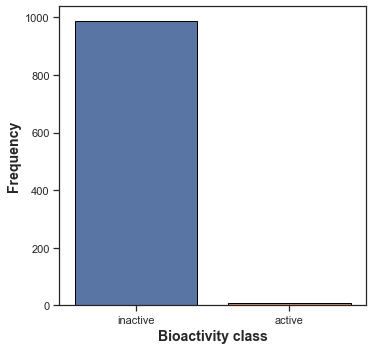

In [44]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### Scatter plot of MW versus LogP
It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

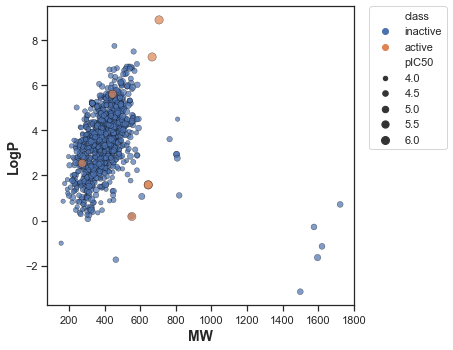

In [45]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

## Box plots

**pIC50 value**

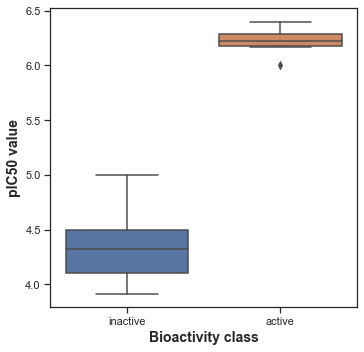

In [46]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [47]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [48]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,0.000002,0.05,Different distribution (reject H0)


**MW**

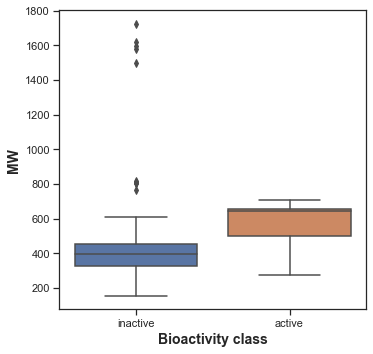

In [49]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [50]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,1283.0,0.002041,0.05,Different distribution (reject H0)


**LogP**

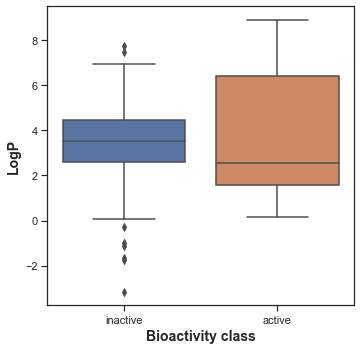

In [51]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [52]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,3321.0,0.426773,0.05,Same distribution (fail to reject H0)


**NumHDonors**

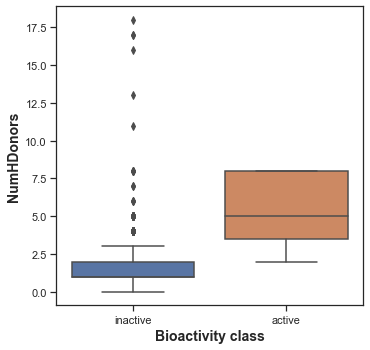

In [53]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**


In [54]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,585.5,0.000041,0.05,Different distribution (reject H0)


**NumHAcceptors**

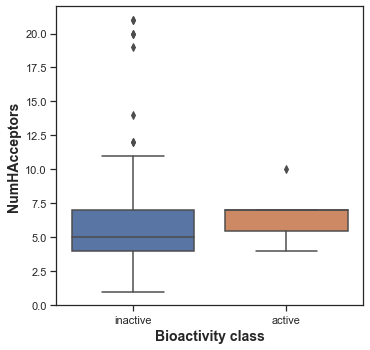

In [55]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [56]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,2319.5,0.063414,0.05,Same distribution (fail to reject H0)


**Interpretation of Statistical Results**

## Box Plots

## pIC50 values

Taking a look at pIC50 values, the actives and inactives displayed statistically significant difference, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.

## Lipinski's descriptors

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), LogP and NumHAcceptors exhibited no difference between the actives and inactives while the other 2 descriptors (MW, NumHDonors and NumHAcceptors) shows statistically significant difference between actives and inactives.

Lipinski's rule of five, also known as Pfizer's rule of five or simply the rule of five (RO5), is a rule of thumb to evaluate druglikeness or determine if a chemical compound with a certain pharmacological or biological activity has chemical properties and physical properties that would make it a likely orally active drug in humans. The rule was formulated by Christopher A. Lipinski in 1997, based on the observation that most orally administered drugs are relatively small and moderately lipophilic molecules.
<a href="https://en.wikipedia.org/wiki/Lipinski%27s_rule_of_five#cite_note-1">[1]</a>
<a href="https://en.wikipedia.org/wiki/Lipinski%27s_rule_of_five#cite_note-2">[2]</a>

The rule describes molecular properties important for a drug's pharmacokinetics in the human body, including their absorption, distribution, metabolism, and excretion ("ADME"). However, the rule does not predict if a compound is pharmacologically active.

The rule is important to keep in mind during drug discovery when a pharmacologically active lead structure is optimized step-wise to increase the activity and selectivity of the compound as well as to ensure drug-like physicochemical properties are maintained as described by Lipinski's rule.
<a href="https://en.wikipedia.org/wiki/Lipinski%27s_rule_of_five#cite_note-3">[3]</a>
Candidate drugs that conform to the RO5 tend to have lower attrition rates during clinical trials and hence have an increased chance of reaching the market.<a href="https://en.wikipedia.org/wiki/Lipinski%27s_rule_of_five#cite_note-4">[4]</a> Omeprazole is a popular drug that conforms to Lipinski's rule of five.

Some authors have criticized the rule of five for the implicit assumption that passive diffusion is the only important mechanism for the entry of drugs into cells, ignoring the role of transporters. For example, O'Hagan and co-authors wrote as follows:<a href="https://en.wikipedia.org/wiki/Lipinski%27s_rule_of_five#cite_note-5">[5]</a>

This famous "rule of 5" has been highly influential in this regard, but only about 50 % of orally administered new chemical entities actually obey it.
Studies have also demonstrated that some natural products break the chemical rules used in Lipinski filter such as macrolides and peptides.
<a href="https://en.wikipedia.org/wiki/Lipinski%27s_rule_of_five#cite_note-6">[6]</a>
<a href="https://en.wikipedia.org/wiki/Lipinski%27s_rule_of_five#cite_note-7">[7]</a>
<a href="https://en.wikipedia.org/wiki/Lipinski%27s_rule_of_five#cite_note-8">[8]</a>

### Components of the rule

Lipinski's rule states that, in general, an orally active drug has no more than one violation of the following criteria:<a href="https://en.wikipedia.org/wiki/Lipinski%27s_rule_of_five#cite_note-9">[9]</a>

- No more than 5 hydrogen bond donors (the total number of nitrogen–hydrogen and oxygen–hydrogen bonds)
- No more than 10 hydrogen bond acceptors (all nitrogen or oxygen atoms)
- A molecular mass less than 500 daltons
- An octanol-water partition coefficient <a href="https://en.wikipedia.org/wiki/Lipinski%27s_rule_of_five#cite_note-10">[10]</a> (log P) that does not exceed 5

Note that all numbers are multiples of five, which is the origin of the rule's name. As with many other rules of thumb, there are many exceptions.





# Part 3

# Descriptor Calculation and Dataset Preparation

Will calculate molecular descriptors that are essentially quantitative description of the compounds in the dataset. Finally, we prepare this into a dataset for subsequent model building in **Part 4**.

**Download PaDEL-Descriptor**

In [57]:
#! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
#! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

In [58]:
#! unzip padel.zip

In [59]:
import pandas as pd

In [60]:
df3 = pd.read_csv('dengue_04_bioactivity_data_3class_pIC50.csv')

In [61]:
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,240.262,2.80020,0.0,4.0,4.000000
1,1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,268.224,2.44040,1.0,4.0,4.909742
2,2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,407.426,1.38560,1.0,5.0,4.000000
3,3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,306.277,3.84800,1.0,5.0,4.292685
4,4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,372.772,2.36698,0.0,8.0,4.000000
...,...,...,...,...,...,...,...,...,...
1098,1098,CHEMBL4640021,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,intermediate,597.719,5.95437,5.0,4.0,5.886057
1099,1099,CHEMBL4642885,CCCCCC(=O)N[C@@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OC...,intermediate,542.507,6.08510,3.0,4.0,5.508638
1100,1100,CHEMBL4636584,N=C(N)NCc1ccc(CNC(=O)[C@H](NC(=O)c2ccc(Oc3cccc...,intermediate,682.608,7.13527,5.0,5.0,5.602060
1101,1101,CHEMBL4633312,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,active,666.609,7.26117,5.0,4.0,6.267606


In [62]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [63]:
! cat molecule.smi | head -5

COc1ccc2nc3cccc(OC)c3nc2c1	CHEMBL1401841
O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O	CHEMBL1608853
O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CCOCC1	CHEMBL1429799
O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1	CHEMBL246446
CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(Cl)c1=O	CHEMBL1383455


In [64]:
! cat molecule.smi | wc -l

    1103


## Calculate fingerprint descriptors

### Calculate PaDEL descriptors

In [ ]:
! cat padel.sh

In [ ]:
! bash padel.sh

## Preparing the X and Y Data Matrices

## X data matrix

In [65]:
df3_X = pd.read_csv('descriptors_output.csv')

In [66]:
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL1401841,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL1608853,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL246446,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL1429799,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL1383455,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,CHEMBL4642710,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1099,CHEMBL4640021,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1100,CHEMBL4643526,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1101,CHEMBL4636584,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1099,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1100,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1101,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Y variable

## Convert IC50 to pIC50

In [68]:
df3_Y = df3['pIC50']
df3_Y

0       4.000000
1       4.909742
2       4.000000
3       4.292685
4       4.000000
          ...   
1098    5.886057
1099    5.508638
1100    5.602060
1101    6.267606
1102    5.200659
Name: pIC50, Length: 1103, dtype: float64

## **Combining X and Y variable**

In [69]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.909742
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.292685
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.886057
1099,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.508638
1100,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.602060
1101,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.267606


In [70]:
dataset3.to_csv('dengue_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

# Part 4

We will build a regression model of herpesvirus inhibitors using the random forest algorithm.

## Import libraries

In [71]:
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [72]:
df = pd.read_csv('dengue_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.909742
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.292685
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.886057
1099,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.508638
1100,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.602060
1101,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.267606


## Input features

The herpesvirus data set contains 881 input features and 1 output variable (pIC50 values).

In [73]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1099,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1100,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1101,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Output features

In [74]:
Y = df.pIC50
Y

0       4.000000
1       4.909742
2       4.000000
3       4.292685
4       4.000000
          ...   
1098    5.886057
1099    5.508638
1100    5.602060
1101    6.267606
1102    5.200659
Name: pIC50, Length: 1103, dtype: float64

### Examine the data dimension

In [75]:
X.shape

(1103, 881)

In [76]:
Y.shape

(1103,)

### Remove low variance features

In [77]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [78]:
X.shape

(1103, 164)

In [79]:
Y.shape
Y

0       4.000000
1       4.909742
2       4.000000
3       4.292685
4       4.000000
          ...   
1098    5.886057
1099    5.508638
1100    5.602060
1101    6.267606
1102    5.200659
Name: pIC50, Length: 1103, dtype: float64

## **Data split (80/20 ratio)**

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [81]:
X_train.shape, Y_train.shape

((882, 164), (882,))

In [82]:
X_test.shape, Y_test.shape

((221, 164), (221,))

## Building a Regression Model using Random Forest

In [83]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.13400419053083112

In [84]:
Y_pred = model.predict(X_test)

## Scatter Plot of Experimental vs Predicted pIC50 Values

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

# Part 4

In [ ]:
#! pip install lazypredict

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## Data pre-processing

In [ ]:
df = pd.read_csv('dengue_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [ ]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

In [ ]:
# Examine X dimension
X.shape

In [ ]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

In [ ]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Compare ML algorithms

In [ ]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

In [ ]:
# Performance table of the training set (80% subset)
predictions_train

In [ ]:
# Performance table of the test set (20% subset)
predictions_test

## Data visualization of model performance

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

In [ ]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))